# loading data

In [130]:
%pip install -r ./Server/requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\villiam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("./Server")

from Server.Schedule.ForecastScheduler import ForecastScheduler, relu
from Server.Schedule.NaiveScheduler import testJob, naiveScheduler
from Server.Production.Prod_device import Prod_device
from Server.Tools import calculateCombinedDraw

In [132]:
first = [0.307,0.34600000000000003,0.38,0.321,0.372,0.387,0.367,0.379,0.34600000000000003,0.319,0.28500000000000003,0.261,0.229,0.209,0.195,0.185,0.177,0.166,0.147,0.12,0.105,0.089,0.076,0.069,0.059000000000000004,0.048,0.035,0.026000000000000002,0.01,0.006,0.005,0.003,0.003,0.002,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.003,0.002,0.004,0.004,0.004,0.004,0.004,0.005,0.005,0.005,0.006,0.006,0.011,0.01,0.013000000000000001,0.015,0.016,0.018000000000000002,0.023,0.029,0.034,0.035,0.041,0.054,0.08,0.057,0.062,0.058,0.054,0.054,0.094,0.089,0.121,0.163,0.23800000000000002,0.362,0.367,0.39,0.397,0.41000000000000003,0.448,0.519,0.558,0.596,0.639,0.555,0.491,0.617,0.742,0.742,0.619,0.511,0.46900000000000003,0.555,0.995,1.05,0.998,0.933,0.631,0.405,0.322,0.23500000000000001,0.20700000000000002,0.185,0.197,0.228,0.20400000000000001,0.186,0.199,0.254,0.278,0.278,0.199,0.195,0.219,0.396,0.8140000000000001,0.863,0.9470000000000001,0.8140000000000001,0.767,0.615,0.615,0.649,0.682,0.769,0.735,0.6970000000000001,0.719,3.2,3.31,3.35,2.74,0.732,2.49,2.66,3.75,1.22,4.16,0.993,0.9540000000000001,1.04,3.95,0.966,3.88,4.08,1.76,3.71,3.73,3.66,3.67,3.65,3.62,3.67,3.67,3.7,3.66,3.64,3.62,3.61,3.63,3.64,3.57,3.47,3.53,3.48,3.47,3.46,3.19,3.4,3.42,3.43,3.33,3.18,3.0,3.38,3.3,3.24,3.26,3.18,3.17,3.09,3.2,3.13,2.5,1.76,2.49,2.22,2.67,1.91,2.06,1.36,1.38,1.41,1.91,1.51,1.78,1.56,2.07,1.39,1.37,1.12,1.15,0.522,1.17,1.56,1.31,1.37,0.9580000000000001,0.674,0.5660000000000001,0.6990000000000001,0.615,0.748,0.47900000000000004,0.435,0.425,0.428,0.365]
second = [0.455,0.297,0.256,0.269,0.27,0.268,0.28200000000000003,0.219,0.20700000000000002,0.2,0.182,0.183,0.17500000000000002,0.17,0.196,0.199,0.23600000000000002,0.209,0.194,0.222,0.199,0.16,0.14400000000000002,0.139,0.12,0.11800000000000001,0.074,0.065,0.048,0.038,0.026000000000000002,0.016,0.006,0.005,0.003,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.003,0.002,0.002,0.003,0.002,0.002,0.002,0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.003,0.002,0.002,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.002,0.002,0.002,0.003,0.003,0.003,0.004,0.004,0.004,0.004,0.004,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.004,0.004,0.006,0.006,0.009000000000000001,0.012,0.018000000000000002,0.023,0.024,0.03,0.038,0.049,0.068,0.093,0.115,0.153,0.202,0.244,0.252,0.23,0.193,0.202,0.184,0.184,0.163,0.165,0.185,0.201,0.22,0.255,0.23,0.186,0.23500000000000001,0.302,0.216,0.26,0.357,0.316,0.422,0.463,0.422,0.353,0.34900000000000003,0.39,0.502,0.6990000000000001,0.796,0.757,0.795,0.6920000000000001,0.663,0.63,0.505,0.6890000000000001,0.612,0.6960000000000001,0.877,1.14,1.29,1.31,1.11,1.18,1.12,1.0,0.855,1.3,1.12,1.54,1.28,1.01,1.03,1.29,1.8,1.51,2.58,2.9,2.13,2.27,1.67,1.79,1.77,1.46,1.55,1.38,1.19,1.08,1.21,1.84,1.66,2.32,1.7,1.56,1.7,1.31,1.65,1.86,2.03,1.86,2.52,2.51,1.88,2.63,1.71,1.92,2.03,1.71,1.85,2.38,1.69,1.56,1.89,1.84,2.17,1.98,2.07,1.91,2.37,1.79,2.18,2.33,1.65,1.95,1.72,1.97,1.71,1.81,2.01,2.01,3.24,1.82,1.87,1.7,1.88,1.74,1.56,1.53,1.73,1.86,2.06,1.91,1.58,1.91,1.54,2.31,1.73,1.79,2.13,1.53,1.64,1.91,2.03,1.77,1.69,1.33,1.75,1.52,1.31,1.52,0.85,0.805,0.748,0.72,0.7020000000000001,0.678,0.605,0.587,0.613,0.629,0.511,0.499,0.47300000000000003,0.401,0.357,0.318]
first.reverse()
second.reverse()
data = first + second

dayLen = len(first)

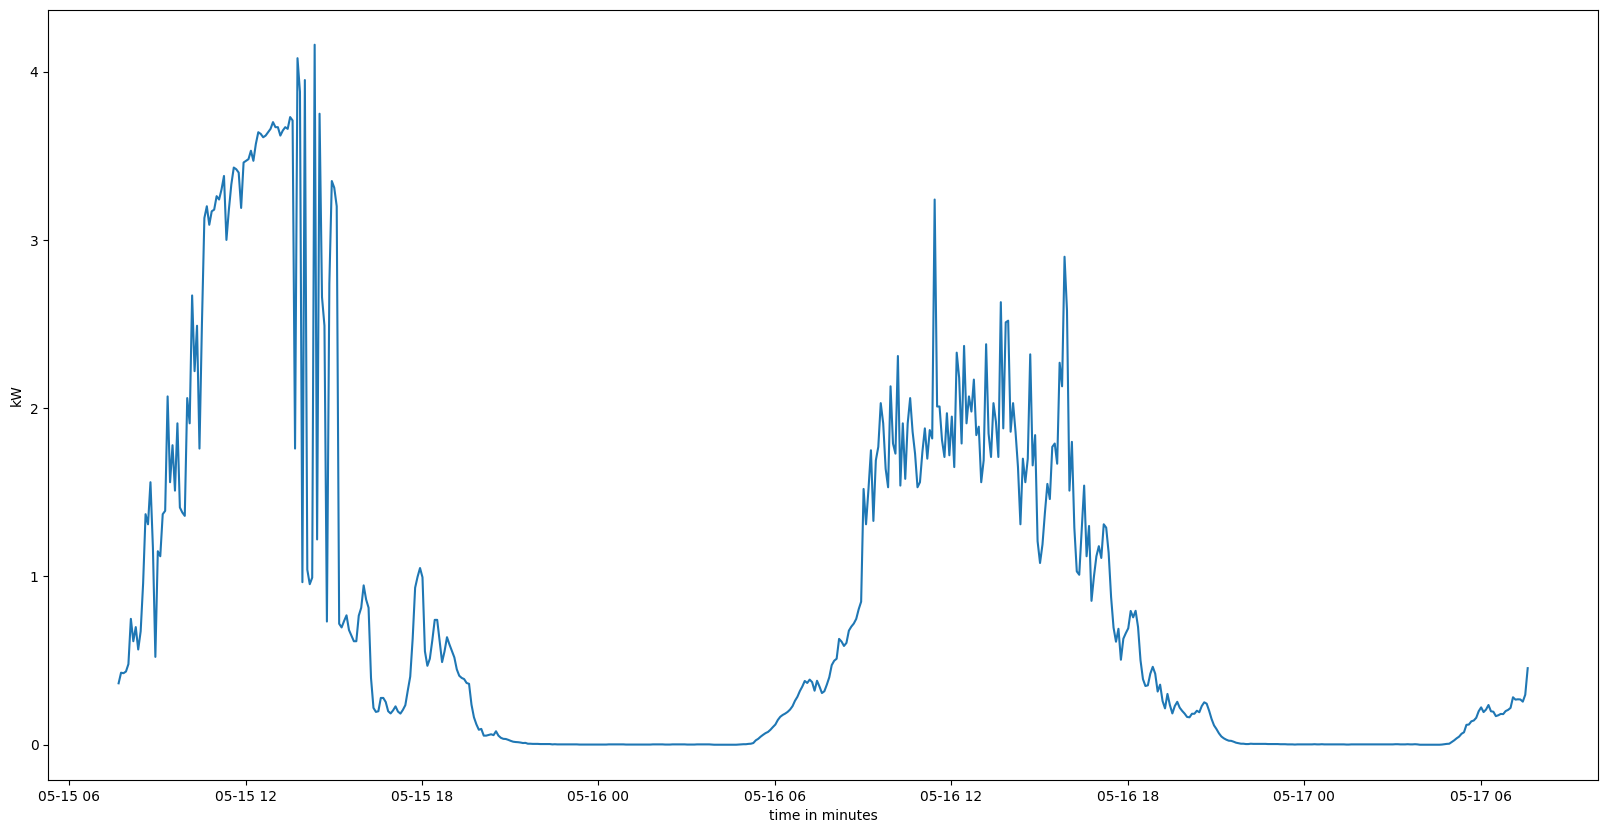

In [133]:
from datetime import datetime
startTime = datetime(year= 2023, month = 5, day = 15, hour=7,minute=41)
times = [startTime.timestamp() + i*300 for i in range(0,len(data))]
times = [datetime.fromtimestamp(t) for t in times]

plt.figure(figsize=(20,10))
plt.xlabel("time in minutes")
plt.ylabel("kW")
plt.plot(times,data)

In [134]:
class dataReader(Prod_device):
    def __init__(self):
        self.data = data # pd.read_csv("./Server/Forecast/randers.csv")["pv_estimate"].to_list() # TODO change data
        self.counter = dayLen # starting a day ahead
    
    def get_power(self):
        result = self.data[self.counter]
        self.counter += 1
        return result
    
    def get_history(self):
        return self.data[self.counter - dayLen: self.counter]


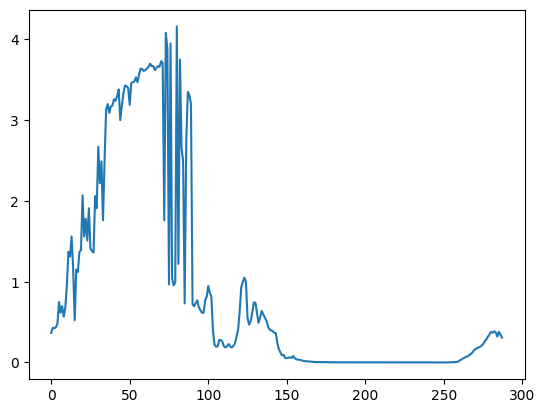

In [135]:
plt.plot(dataReader().get_history())

In [136]:
timePerStep = 5 / 60 # used for kwh conversion

def calculateScore(prod,draw):
    return sum([abs(prod[i] - draw[i]) for i in range(0,dayLen)])

def calculateGridPower(prod,draw):
    return sum([relu(draw[i] - prod[i]) * timePerStep for i in range(0,dayLen)])

# variables:

In [137]:
diff_threshold = 0
start_threshold = 0.1
jobCount = 10 # only while using duplicates

# Jobs

In [138]:
# duplicate jobs
#jobsForNaive = [testJob(5,0.5,0,0,i) for i in range(0,jobCount)]
#jobsForForecast = [testJob(5,0.5,0,0,i) for i in range(0,jobCount)]

def jobs():
    return [testJob(60 / 5,3.600,0,0,"oven"),
            testJob(20 /5,0.900,0,0,"Microwave"),
            testJob(60 / 5,0.592,0,0,"dryer"),
            testJob(60 / 5,0.800,0,0,"washing machine"),
            testJob(60 / 5,0.593,0,0,"dish washer machine"),
            testJob(5 / 5,2.400,0,0,"water heater"),
            testJob(10 / 5,1.110,0,0,"coffee machine")]
def lessJobs():
    return jobs()[2:5]

jobsForNaive = jobs()
jobsForForecast = jobs()

print([job.name for job in jobsForNaive])

['oven', 'Microwave', 'dryer', 'washing machine', 'dish washer machine', 'water heater', 'coffee machine']


# Naive test

In [139]:
production = dataReader()
naiveSch = naiveScheduler(jobsForNaive, start_threshold, diff_threshold)

In [140]:
for i in range(0,dayLen): # there are 48 point within a day
    p = production.get_power()
    print(naiveSch.run(i,p))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [141]:
finsihedJobs = [i for i in jobsForNaive if i.finished]
draw = calculateCombinedDraw(finsihedJobs,[i for i in range(0,dayLen)])
prod = production.get_history()

naiveScore = calculateScore(prod,draw)
naiveGridPower = calculateGridPower(prod,draw)
print(naiveScore)

175.0250000000002


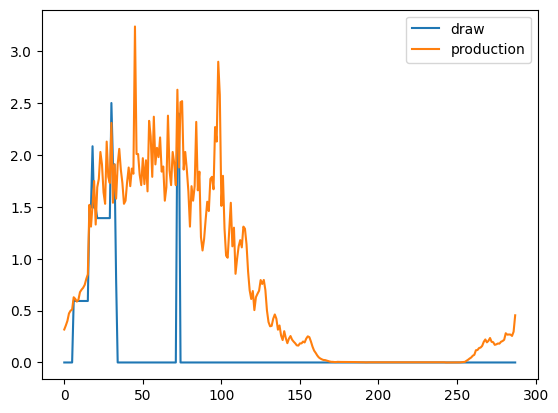

In [142]:
plt.figure()
plt.plot(draw, label="draw")
plt.plot(prod, label="production")
plt.legend()

In [143]:
for job in jobsForNaive:
    if not job.finished:
        print(job.name)

oven


# Forecast test

In [144]:
production = dataReader()
forecastSch = ForecastScheduler(
    jobsForForecast,
    start_threshold,
    diff_threshold,
    production,
    1,
    dayLen,
    "./Server/Forecast/lstm",
    dayLen
    )

The forecast is lower res, than the real data

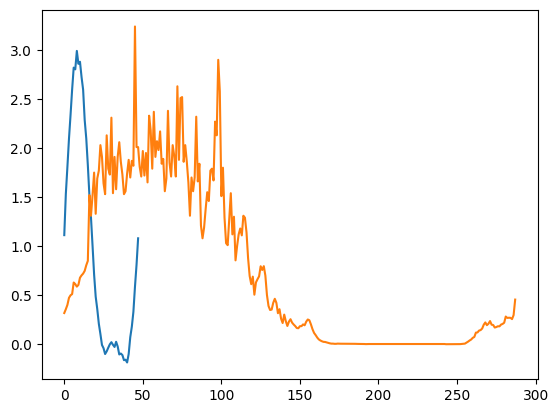

In [145]:
plt.plot(forecastSch.forecast)
d = dataReader()
plt.plot([d.get_power() for i in range(0,dayLen)])

In [146]:
for i in range(0,dayLen):
    p = production.get_power()
    forecastSch.run(i,p)

In [147]:
finsihedJobs = [i for i in jobsForForecast if i.finished]
draw = calculateCombinedDraw(finsihedJobs,[i for i in range(0,dayLen)])
prod = production.get_history()

forecastScore = calculateScore(prod,draw)
forecastGridPower = calculateGridPower(prod,draw)

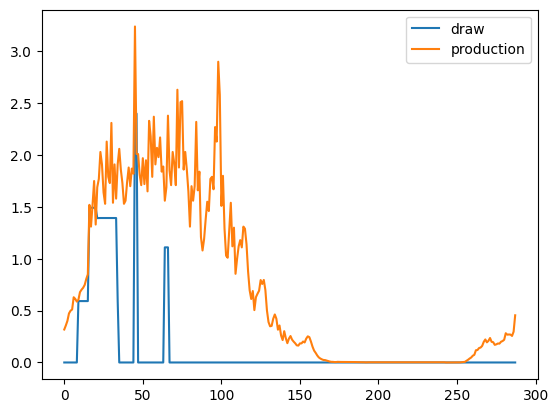

In [148]:
plt.figure() 
plt.plot(draw, label="draw")
plt.plot(prod, label="production")
plt.legend()

In [149]:
for job in jobsForForecast:
    if not job.finished:
        print(job.name)

oven


# comparasion of results

In [150]:
print(diff_threshold)
print("naiveScore", naiveScore)
print("naiveGridPower",naiveGridPower)
print("forecastScore",forecastScore)
print("forecastGridPower",forecastGridPower)

0
naiveScore 175.0250000000002
naiveGridPower 0.16649999999999998
forecastScore 172.49700000000018
forecastGridPower 0.06116666666666666
